Homework 5

Copy this notebook. Rename it as: YOURNAME-HW5-streams 

with your name replacing YOURNAME.

Upload your completed jupyter notebook to elearning site as your homework submission. You can put this notebook on your github.

5.1  Register for a stream of Twitter data

5.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

5.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

5.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing

# Getting Data from Twitter Streaming API

The code below follows the implementation from http://adilmoujahid.com/posts/2014/07/twitter-analytics/

In [ ]:
# %load Code/tweetstream.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy.auth import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "1059593980374142981-t4guYC1q6o8RUpSzw3CIbgyHZ3XOkB"
access_token_secret = "o2qBxUrAzu2HU5d60bb6vXpeDkJSUD39pSs5bhmnBfJ0K"
consumer_key = "PeQ7nqZbgkDsLPYwUhZnCVmEc"
consumer_secret = "StESHDuT5ojw4hkeN6SCS3g6bn2graXr4X1PPUiqtz1oxewsp8"

# This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    def on_data(self, data):
        
        #file=open("TweetOut.txt","a")
        #file.write(data)
        print(data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':
    # This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

      # This line filter Twitter Streams to capture data by the keywords: 'Tesla', 'Stock'

    stream.filter(track=['Tesla', 'SpaceX','Elon','Musk'])

Running the tweetstream.py code to get streaming data from twitter streaming API for 3 different time periods. Tweets1.txt stores data from Dec 15 (run for about 2 hours). Tweets2.txt stores data from Dec 16 (run for about 2 hours). Tweets3.txt stores data from Dec 16 (run for abou 1 hour).

In [ ]:
%%cmd
python Code/tweetstream.py > tweets1.txt

In [ ]:
%%cmd
python Code/tweetstream.py > tweets2.txt

In [ ]:
%%cmd
python Code/tweetstream.py > tweets3.txt

Getting the tweets from tweets1.txt into dataframe.

In [1]:
import json
import pandas as pd
tweets_data_path = 'tweets1.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets['lang'].value_counts()
tweets.head(10)

1215


,text,lang
0,"RT @TansuYegen: Elon Musk, 2024’de dünyanın çe...",tr
1,.@Jason4006 😍😎😉,und
2,@gwestr @ma_xiaoju Not sure what the connectio...,en
3,Sale? Interesting I thought there was a backlo...,en
4,"LOL. ""We're gonna need more batteries""",en
5,"RT @TansuYegen: Elon Musk, 2024’de dünyanın çe...",tr
6,RT @NASA: A second chance for @AstroHague to f...,en
7,Elon Musk defunds Jacobin in anger over bad ch...,en
8,@NobleNoir @Tesla Agreed. Thanks to all the wo...,en
9,Just ordered some sweet accessories for my @Te...,en


Filtering Tweets in English language only.

In [2]:

tweet_text=tweets.loc[tweets['lang'] == 'en', 'text']

print tweet_text.head(10) 

2     @gwestr @ma_xiaoju Not sure what the connectio...
3     Sale? Interesting I thought there was a backlo...
4                LOL. "We're gonna need more batteries"
6     RT @NASA: A second chance for @AstroHague to f...
7     Elon Musk defunds Jacobin in anger over bad ch...
8     @NobleNoir @Tesla Agreed. Thanks to all the wo...
9     Just ordered some sweet accessories for my @Te...
10    RT @elonmusk: Tesla is releasing all vehicles ...
11    RT @elonmusk: Tesla is releasing all vehicles ...
12    Mysterious 'UFO' drifts past Elon Musk's Space...
Name: text, dtype: object


##### Repeating same for tweets2.txt and tweets3.txt

In [3]:

import json
import pandas as pd
tweets_data_path = 'tweets2.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets2 = pd.DataFrame()
tweets2['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets2['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets2['lang'].value_counts()
tweets2.head(10)

1331


,text,lang
0,@CaldeiraEntert @Tesla @S_Padival Never,en
1,RT @gmbankrupt: The depths at which Elon will ...,en
2,"RT @TansuYegen: Elon Musk, 2024’de dünyanın çe...",tr
3,RT @SpaceX: Dragon completed its first flight ...,en
4,Tesla shares could surge nearly 27% as it beco...,en
5,RT @TeslaOpinion: SpaceX's Starlink internet: ...,en
6,@xSUND0WN get a tesla,tr
7,@elonmusk just made my first Twitter account t...,en
8,I’d have lost too much if it was a conviction ...,en
9,@ma_xiaoju @Tesla @S_Padival This is what we a...,en


In [4]:
tweet_text=tweets2.loc[tweets2['lang'] == 'en', 'text']

print tweet_text.head(10)

0               @CaldeiraEntert @Tesla @S_Padival Never
1     RT @gmbankrupt: The depths at which Elon will ...
3     RT @SpaceX: Dragon completed its first flight ...
4     Tesla shares could surge nearly 27% as it beco...
5     RT @TeslaOpinion: SpaceX's Starlink internet: ...
7     @elonmusk just made my first Twitter account t...
8     I’d have lost too much if it was a conviction ...
9     @ma_xiaoju @Tesla @S_Padival This is what we a...
10    RT @joebernard: It’s hard to describe the acce...
12    RT @28delayslater: $TSLAQ - parking lots are e...
Name: text, dtype: object


In [5]:
import json
import pandas as pd
tweets_data_path = 'tweets3.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print len(tweets_data)

tweets3 = pd.DataFrame()
tweets3['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets3['lang'] = [tweet.get('lang','') for tweet in tweets_data]
tweets_by_lang = tweets3['lang'].value_counts()
tweets3.head(10)

1082


,text,lang
0,RT @guapacho: La Tesla Gigafactory 1 ya es la ...,es
1,RT @moazzamkhan1508: Ordered online and got it...,en
2,"RT @filmdenkare: ""Plüton gezegenlikten çıkarıl...",tr
3,@FuzeIII Fusée SpaceX :3,fr
4,Tesla Club Rostov in АЗС ЛУКОЙЛ @ Oktyabrskaya...,und
5,RT @vincent13031925: Video of Tesla ( China ) ...,en
6,RT @esrayigitsoy: 🔸 #FezlekeMiDedikoduMu 🔸\n...,tr
7,Classic!,en
8,"RT @RationalEtienne: @elonmusk Very nice, Elon...",en
9,RT @elonmusk: @brandonorselli Buying https://t...,en


The followinng function is used to remove stopwords, and special characters and links from the tweets. The function will return strings containing words in lower case format.

In [6]:
import json, nltk, re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_data(tweets_data_path):
    tweets_data = []
    stop_words = set(stopwords.words('english'))
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            if tweet["lang"]=='en':
                tweet_text = tweet["text"]
                #print tweet_text
                filter_url = re.sub(r"http\S+", "", tweet_text)
                #print filter_url
                filter_names = re.sub(r"RT+.*\:", "", filter_url)
                #print filter_names
                filter_splchar = re.sub("[^A-Z a-z]+", "", filter_names)
                filter_stop = [word for word in (filter_splchar.lower()).split() if word not in stop_words]
                result = ' '.join(filter_stop)
                tweets_data.extend(result.split())       
        except:
            continue
            
    return tweets_data

Getting the list of words from cleaned tweets from tweets1.txt and tweet2.txt

In [7]:
tweets1_path = 'tweets1.txt'
tweets1_clean = clean_data(tweets1_path)
print tweets1_clean[:80]
tweets1_words = set(tweets1_clean)
text1_words_file = open('data/tweets1_words.txt', 'w')
for item in list(tweets1_words):
    text1_words_file.write("%s\n" % item)

[u'gwestr', u'maxiaoju', u'sure', u'connection', u'tesla', u'bitcoin', u'actually', u'btc', u'skeptic', u'sale', u'interesting', u'thought', u'backlog', u'lol', u'gonna', u'need', u'batteries', u'second', u'chance', u'astrohague', u'fly', u'space', u'russian', u'spacewalk', u'check', u'repair', u'soyuz', u'amp', u'spacexs', u'dragon', u'spacec', u'elon', u'musk', u'defunds', u'jacobin', u'anger', u'bad', u'chili', u'dog', u'recommendation', u'noblenoir', u'tesla', u'agreed', u'thanks', u'workers', u'ordered', u'sweet', u'accessories', u'tesla', u'pd', u'modelxd', u'evhooks', u'cant', u'wait', u'get', u'also', u'ho', u'tesla', u'releasing', u'vehicles', u'sale', u'today', u'original', u'customer', u'cant', u'take', u'delivery', u'end', u'yearreminder', u'u', u'tesla', u'releasing', u'vehicles', u'sale', u'today', u'original', u'customer', u'cant', u'take', u'delivery']


In [8]:
tweets2_path = 'tweets2.txt'
tweets2_clean = clean_data(tweets2_path)
print tweets2_clean[:80]
tweets2_words = set(tweets2_clean)
text2_words_file = open('data/tweets2_words.txt', 'w')
for item in list(tweets2_words):
    text2_words_file.write("%s\n" % item)

[u'caldeiraentert', u'tesla', u'spadival', u'never', u'depths', u'elon', u'go', u'joke', u'admirablephoto', u'credit', u'wki', u'dragon', u'completed', u'first', u'flight', u'around', u'world', u'years', u'ago', u'today', u'since', u'dragon', u'visited', u'spacestation', u'times', u'n', u'tesla', u'shares', u'could', u'surge', u'nearly', u'becomes', u'sustainably', u'profitable', u'baird', u'says', u'p', u'license', u'print', u'money', u'competitive', u'advantage', u'reducing', u'communications', u'latencylikely', u'elonmusk', u'made', u'first', u'twitter', u'account', u'follow', u'first', u'tweet', u'let', u'say', u'mrmusk', u'inspiration', u'id', u'lost', u'much', u'conviction', u'buy', u'hold', u'best', u'investment', u'best', u'riskrewardsle', u'maxiaoju', u'tesla', u'spadival', u'waiting', u'right', u'hard', u'describe', u'acceleration', u'performance', u'instant', u'access', u'hp', u'youll']


In [9]:
final_words1=pd.DataFrame(tweets1_clean)
pd.DataFrame(final_words1[0].value_counts()).head(10)

,0
tesla,569
elon,166
sale,138
vehicles,138
releasing,136
cant,136
today,135
delivery,133
take,130
u,128


In [10]:
final_words2=pd.DataFrame(tweets2_clean)
pd.DataFrame(final_words2[0].value_counts()).head(10)

,0
tesla,564
elonmusk,192
elon,183
musk,130
model,94
car,74
get,63
already,56
know,55
right,55


Now we apply the BloomFilter from pybloom to split the posts of two days. Then we store it in a dictionary with name of the file as key and list of words as values.

In [11]:
from pybloom import BloomFilter
import os
import re

post_dir = 'data/'
# Read all my posts.
posts = {post_name: open(post_dir + post_name).read() for post_name in os.listdir(post_dir)}
# Create a dictionary of {"post name": "lowercase word set"}.
split_posts = {name: set(re.split("\W+", contents)) for name, contents in posts.items()}

In [12]:
filters = {}
for name, words in split_posts.items():
    print name, words
    filters[name] = BloomFilter(capacity=len(words), error_rate=0.1)
    for word in words:
        filters[name].add(word)
        
def search(search_string):
    search_terms = re.split("\W+", search_string)
    return [name for name, filter in filters.items() if all(term in filter for term in search_terms)]

tweets1_words.txt set(['limited', 'todays', 'augustine', 'asian', 'prebooked', 'saved', 'worked', 'galactics', 'frankhuron', 'tweet', 'davefjones', 'aut', 'honorific', 'sorry', 'spec', 'rise', 'every', 'affect', 'alvarezdec', 'prize', 'skills', 'companies', 'solution', 'teslaownersw', 'convenience', 'announced', 'euvoteleaverd', 'debuting', 'enjoy', 'force', 'corvette', 'direct', 'chef', 'second', 'street', 'n', 'blue', 'hate', 'selected', 'lights', 'solarcity', 'monty', 'fossil', 'nev', 'new', 'increasing', 'officially', 'fugl', 'shocks', 'niche', 'wiseas', 'reporter', 'never', 'china', 'cult', 'kids', 'luggage', 'employees', 'changed', 'gld', 'weekwhoops', 'reports', 'controversy', 'credit', 'smoke', 'elderberries', 'engineers', 'changes', 'cancellation', 'york', 'secure', 'stray', 'highly', 'moral', 'guests', 'would', 'army', 'played', 'bevvscott', 'asses', 'music', 'yuhh', 'tell', 'musk', 'haha', 'jmu', 'phone', 'connecticut', 'warm', 'jmn', 'plottwist', 'tariff', 'must', 'shoot', 

We then create a new directory which holds the files that contains classified tweets according to the days and then search for the next two days words (we will be using tweets3.txt here) that match with the bloom filter data.

In [25]:
matched_words = []
POST_DIR = 'data/'
# Read all my posts.
posts = {post_name: open(POST_DIR + post_name).read() for post_name in os.listdir(POST_DIR)}
# Create a dictionary of {"post name": "lowercase word set"}.
classify_posts = {name: set(re.split("\W+", contents.lower())) for name, contents in posts.items()}

for name, words in classify_posts.items():
       for word in words:
        if search(word) == ['tweets2_words.txt']:
            matched_words.append(word)

In [26]:

print matched_words

['ciad', 'whoops', 'dynamic', 'onlxn', 'woods', 'solarcellphones', 'consider', 'whose', 'buddy', 'rightish', 'bike', 'steezyman', 'slowest', 'producthunt', 'updated', 'risk', 'handling', 'electronics', 'crops', 'wednesday', 'cooksautorepair', 'heading', 'clothes', 'leaders', 'cloudsecurity', 'tires', 'likely', 'helluva', 'estimated', 'machines', 'loaners', 'near', 'liberty', 'evet', 'coefficient', 'specialist', 'met', 'contestto', 'enron', 'enricosalad', 'daughter', 'jams', 'ventures', 'ilk', 'chrysler', 'criticism', 'fantastic', 'iamhubris', 'gesichtbuch', 'seven', 'brought', 'cons', 'cocaine', 'spoke', 'gloss', 'insult', 'program', 'synergie', 'type', 'creates', 'holy', 'wary', 'successful', 'infosec', 'prehestoric', 'tf', 'excellent', 'tradeins', 'dimas', 'divorced', 'mu', 'wort', 'install', 'brake', 'camry', 'root', 'example', 'fortress', 'defer', 'libbycwatson', 'household', 'jalopnik', 'attract', 'looser', 'absolute', 'motion', 'recovery', 'aerosmiths', 'complaining', 'finalist',

We sort the matched words and then plot the top 10 most matched words into a bar chart.

In [16]:
match_words = [x for x in tweets2_clean if x in matched_words]
sort_match = sorted(match_words)
print sort_match

[u'aapl', u'aayenge', u'ab', u'ab', u'ability', u'ability', u'ability', u'able', u'able', u'able', u'able', u'able', u'able', u'able', u'able', u'abledoc', u'abledoc', u'abledoc', u'aboard', u'absolute', u'absolute', u'abusive', u'ac', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'acceleration', u'accept', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'access', u'according', u'according', u'according', u'according', u'according', u'accounting', u'actor', u'actualized', u'acura', u'ad', u'ad

In [17]:
m = pd.DataFrame(sort_match)
match = m[0].value_counts().head(10)
match

note           46
probably       46
almost         45
divorced       42
married        42
information    42
like           36
musks          33
nearly         29
spadival       23
Name: 0, dtype: int64

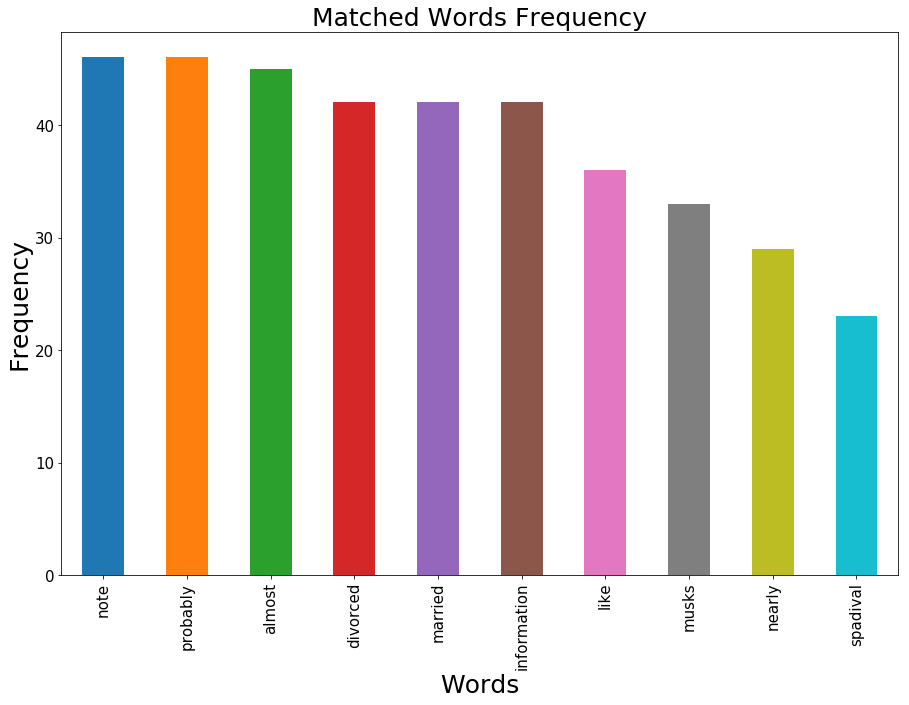

In [19]:
import matplotlib.pyplot as plt
ax = match.plot(x=0, y=1, kind="bar", figsize=(15, 10), fontsize=15)
ax.set_title('Matched Words Frequency', fontsize=25)
ax.set_ylabel("Frequency", fontsize=25)
ax.set_xlabel("Words", fontsize=25)
plt.show()